# How should I choose the stock for the show case.

In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result, overview, roc_results
from lob_data_utils.svm_calculation import lob_svm


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
data_length = 15000
stocks = list(roc_results.results_15000.keys())

In [3]:
descriptions = []
index = []
for s in stocks:
    df, df_cv, df_test = lob.load_prepared_data(
        s, data_dir='../../queue_imbalance/data/prepared', cv=True, length=data_length)
    desc = {'stock': s}
    index.append(s)
    for i, row in df.describe().iterrows():
        for key, value in row.items():
            desc['{}-{}'.format(key, i)] = value
    descriptions.append(desc)

In [4]:
df_describe = pd.DataFrame(descriptions, index=index)
df_describe.columns

Index(['ask_price-25%', 'ask_price-50%', 'ask_price-75%', 'ask_price-count',
       'ask_price-max', 'ask_price-mean', 'ask_price-min', 'ask_price-std',
       'bid_price-25%', 'bid_price-50%', 'bid_price-75%', 'bid_price-count',
       'bid_price-max', 'bid_price-mean', 'bid_price-min', 'bid_price-std',
       'mid_price-25%', 'mid_price-50%', 'mid_price-75%', 'mid_price-count',
       'mid_price-max', 'mid_price-mean', 'mid_price-min', 'mid_price-std',
       'mid_price_indicator-25%', 'mid_price_indicator-50%',
       'mid_price_indicator-75%', 'mid_price_indicator-count',
       'mid_price_indicator-max', 'mid_price_indicator-mean',
       'mid_price_indicator-min', 'mid_price_indicator-std',
       'queue_imbalance-25%', 'queue_imbalance-50%', 'queue_imbalance-75%',
       'queue_imbalance-count', 'queue_imbalance-max', 'queue_imbalance-mean',
       'queue_imbalance-min', 'queue_imbalance-std', 'stock',
       'sum_buy_bid-25%', 'sum_buy_bid-50%', 'sum_buy_bid-75%',
       'sum_b

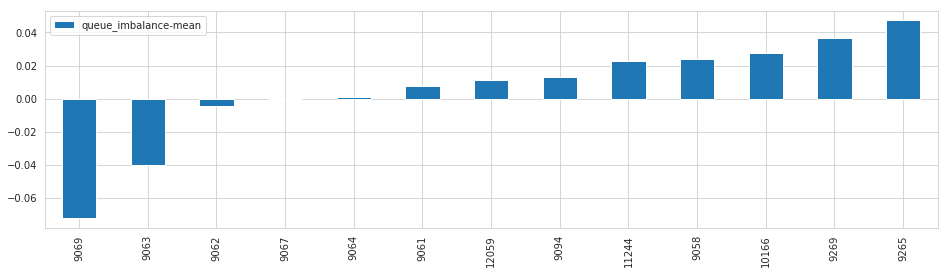

In [5]:
df_describe[['queue_imbalance-mean']].sort_values(by='queue_imbalance-mean').plot(kind='bar', figsize=(16,4))
plt.legend()

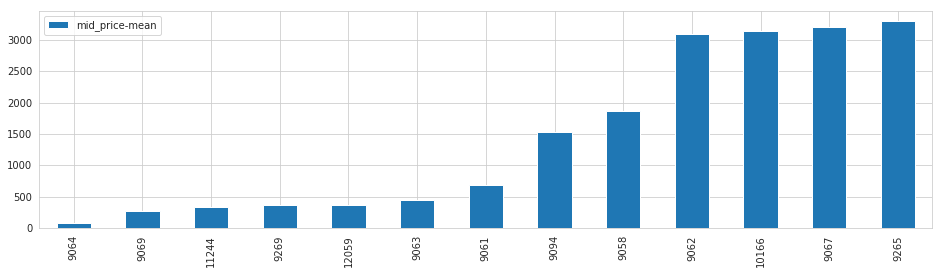

In [6]:
df_describe[['mid_price-mean']].sort_values(by='mid_price-mean').plot(kind='bar', figsize=(16,4))
plt.legend()

In [7]:
# stock in 12.5 quantile

mid = df_describe.quantile(q=0.125)['mid_price-mean']
df_describe.sort_values(
    by='mid_price-mean', ascending=False)[df_describe['mid_price-mean'] <= mid].head(1)['mid_price-mean']

9069    275.7958
Name: mid_price-mean, dtype: float64

In [8]:
# stock in 87.5 quantile

mid = df_describe.quantile(q=0.875)['mid_price-mean']
print(mid)
df_describe.sort_values(
    by='mid_price-mean', ascending=True)[df_describe['mid_price-mean'] >= mid].head(1)['mid_price-mean']

3168.5874027777777


9067    3203.91425
Name: mid_price-mean, dtype: float64

In [9]:
# stock in 50 quantile

mid = df_describe.quantile(q=0.5)['mid_price-mean']
print(mid)
print(df_describe.sort_values(
    by='mid_price-mean', ascending=True)[df_describe['mid_price-mean'] >= mid].head(1)['mid_price-mean'])

mid = df_describe.quantile(q=0.5)['mid_price-mean']
df_describe.sort_values(
    by='mid_price-mean', ascending=False)[df_describe['mid_price-mean'] <= mid].head(1)['mid_price-mean']

682.5328888888885
9061    682.532889
Name: mid_price-mean, dtype: float64


9061    682.532889
Name: mid_price-mean, dtype: float64

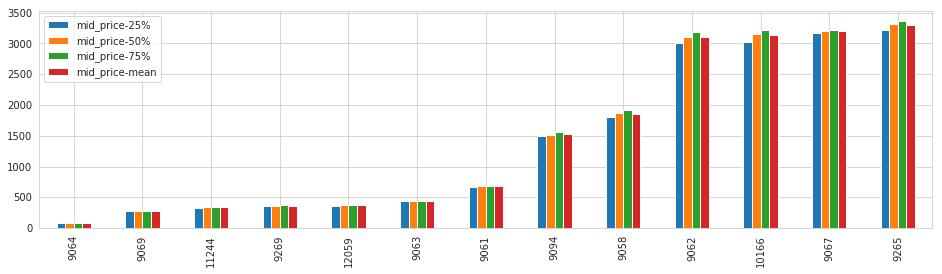

In [10]:
df_describe[['mid_price-25%', 'mid_price-50%', 'mid_price-75%', 'mid_price-mean']].sort_values(
    by='mid_price-mean').plot(kind='bar', figsize=(16,4))
plt.legend()

## Add some logistic regression results

In [11]:
results = []
for i, row in df_describe.iterrows():
    results.append(roc_results.results_10000[i])
df_describe['log_reg'] = results

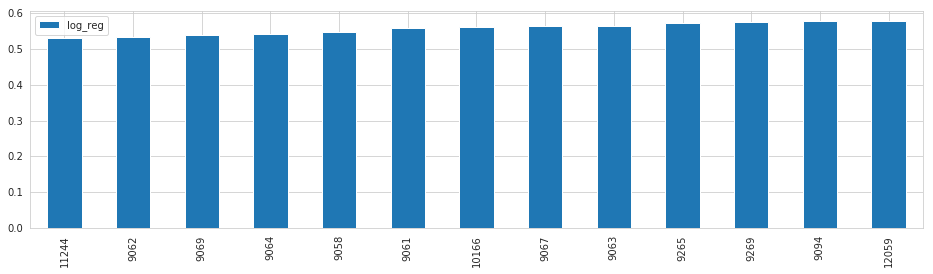

In [12]:
df_describe[['log_reg']].sort_values(by='log_reg').plot(kind='bar', figsize=(16,4))
plt.legend()

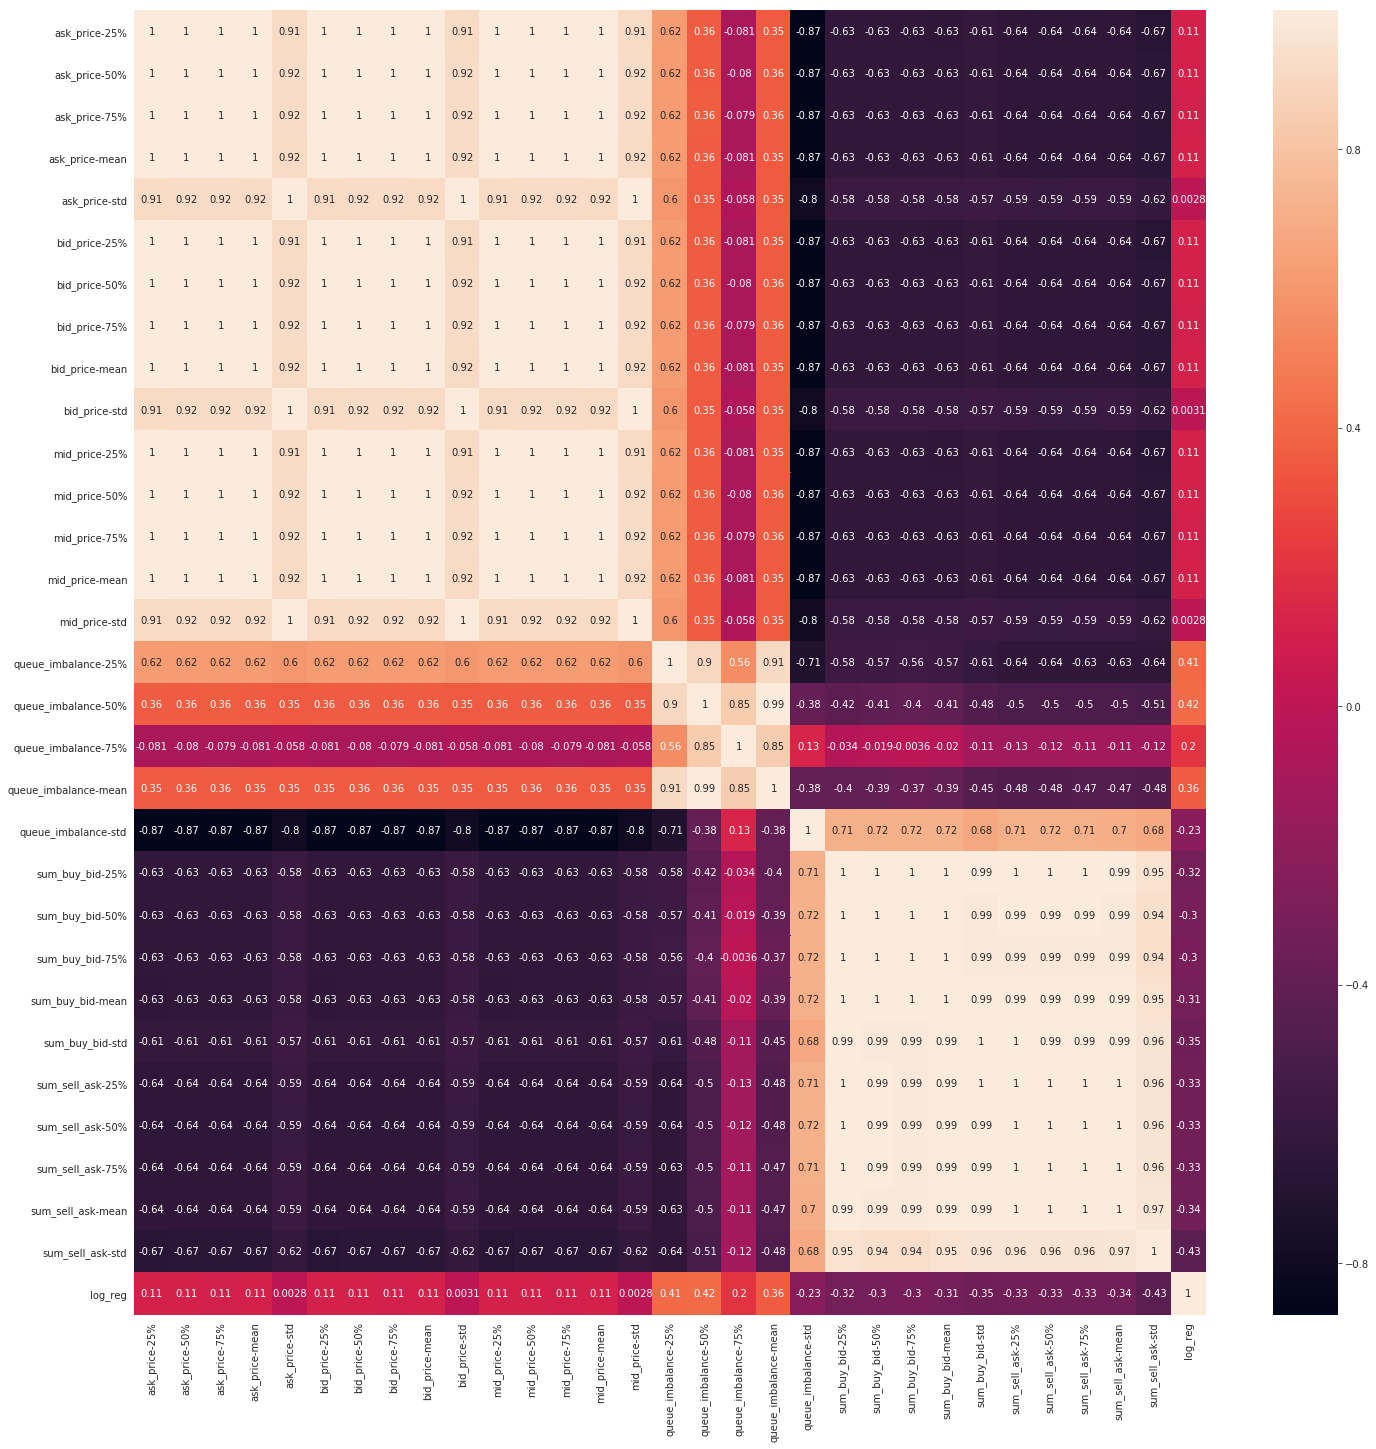

In [13]:
plt.figure(figsize=(24, 24))
cols_to_plot = [c for c in df_describe.columns 
                if 'max' not in c and 'min' not in c and 'count' not in c and not 'mid_price_ind' in c]
sns.heatmap(df_describe[cols_to_plot].corr(),
           annot=True)

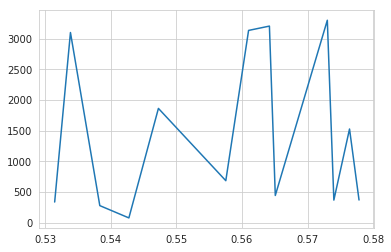

In [14]:
df_describe = df_describe.sort_values(by='log_reg')
plt.plot(df_describe['log_reg'], df_describe['mid_price-mean'])

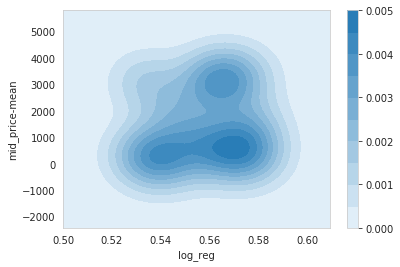

In [15]:
sns.kdeplot(df_describe['log_reg'], df_describe['mid_price-mean'], shade=True, legend=True, cbar=True)

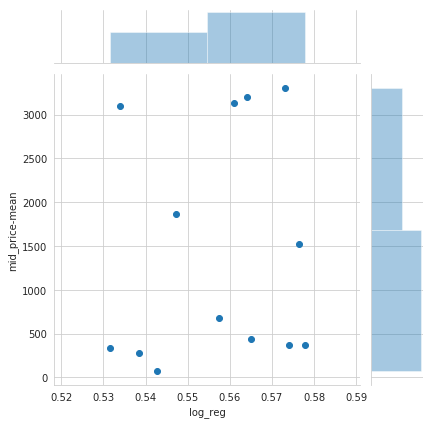

In [16]:
sns.jointplot(df_describe['log_reg'], df_describe['mid_price-mean'])